In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df_SPX = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', parse_dates=True)

In [3]:
df_SPX.dtypes

Price       object
Open        object
High        object
Low         object
Change %    object
dtype: object

In [4]:
for col in df_SPX.columns[:-1]:
    df_SPX[col]=pd.to_numeric(df_SPX[col].str.replace(',',''))
df_SPX['Change %']=pd.to_numeric(df_SPX['Change %'].str.replace('%',''))

In [5]:
df_SPX.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object

In [6]:
df_SPX.sort_index()

,Price,Open,High,Low,Change %
Date,,,,,
2006-01-04,1273.46,1268.80,1275.37,1267.74,0.37
2006-01-05,1273.48,1273.46,1276.91,1270.30,0.00
2006-01-06,1285.45,1273.48,1286.09,1273.48,0.94
2006-01-09,1290.15,1285.45,1290.78,1284.82,0.37
2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.04
...,...,...,...,...,...
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08


In [9]:
rows='Date>="2015-06-01" and Date<"2016-05-31"'
cols=['High','Low']
objective=df_SPX.query(rows)[cols]
objective

,High,Low
Date,,
2016-05-27,2099.06,2090.06
2016-05-26,2094.30,2087.08
2016-05-25,2094.73,2078.93
2016-05-24,2079.67,2052.65
2016-05-23,2055.58,2047.26
...,...,...
2015-06-05,2100.99,2085.67
2015-06-04,2112.89,2093.23
2015-06-03,2121.92,2109.61


In [8]:
display(df_SPX.describe())
for col in df_SPX.columns[:-1]:
    print(col,'\t min:{},max:{},average:{}'.format(df_SPX[col].min(),df_SPX[col].max(),df_SPX[col].mean()))

,Price,Open,High,Low,Change %
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,1576.930597,1576.562337,1585.094839,1567.404445,0.032105
std,450.029412,449.869900,449.078688,450.705886,1.223285
min,676.530000,679.280000,695.270000,666.790000,-9.030000
25%,1266.690000,1266.670000,1274.560000,1259.420000,-0.390000
50%,1428.610000,1428.650000,1437.650000,1422.340000,0.060000
75%,1986.510000,1985.320000,1993.480000,1975.670000,0.540000
max,2690.160000,2692.710000,2694.970000,2685.920000,11.580000


Price 	 min:676.53,max:2690.16,average:1576.9305966191585
Open 	 min:679.28,max:2692.71,average:1576.5623367583687
High 	 min:695.27,max:2694.97,average:1585.0948392442833
Low 	 min:666.79,max:2685.92,average:1567.4044448127313


<AxesSubplot:xlabel='Date'>

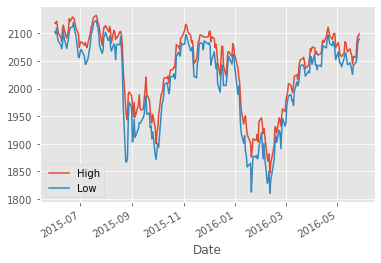

In [10]:
plt.style.use('ggplot')

objective.plot()

<AxesSubplot:>

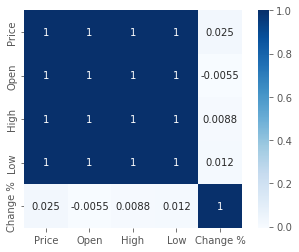

In [29]:
df_SPX_corr=df_SPX.corr()
sns.heatmap(df_SPX_corr,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')

<AxesSubplot:xlabel='Date'>

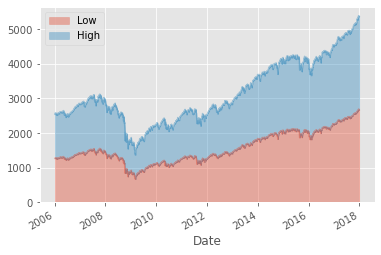

In [30]:
df_SPX[ ['Low', 'High'] ].plot.area(alpha=0.4)

<AxesSubplot:xlabel='Date'>

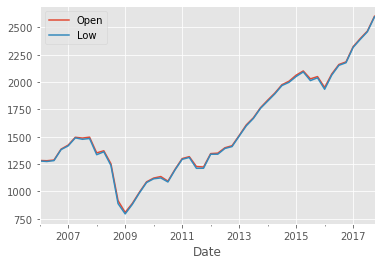

In [16]:
by_BMonth =pd.Grouper(freq='BQ')
data_BQ=df_SPX.groupby(by_BMonth).mean()[['Open','Low']]
data_BQ.plot()